# Setup

~~Create environment~~
~~open file and create dataframe~~
~~remove outliers using turkey outliers~~

# Figures and Table to Replicate

Figure 1
Figure 2
~~Figure 3~~
Table 2
Table 3
~~Table 4~~
Table 5
Table 6
Table 7

In [21]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt

In [23]:
# Reading input file and creating dataframe for analysis

df = pd.read_csv("C:\SENG-480B-Final-Project\Input files\prlist.txt", sep=",")   
df["sloc"]=df['Insertions']+df['Deletions']+df['Modifications']

In [15]:
# Using turkey outlier to drop outliers in the data. This is the same method as the original study for continuity

def turkey_outlier(df, column, whisker_width=1.5):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP

display(df)
display(df.describe())
df = turkey_outlier(df, 'Merge time minutes', whisker_width=1.5)
df = turkey_outlier(df, 'sloc', whisker_width=1.5)
display(df)
df.describe()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
0,CPlusPlus,tensorflow-tensorflow,337,2015-11-23 22:03:56Z,2015-12-23 19:20:24Z,43036,1,5,0,0,5
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5
2,CPlusPlus,tensorflow-tensorflow,541,2015-12-18 02:30:09Z,2016-01-11 17:43:05Z,35472,3,150,0,0,150
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96
...,...,...,...,...,...,...,...,...,...,...,...
845311,Ruby,rapid7-metasploit-framework,14840,2021-03-02 11:01:02Z,2021-03-02 11:27:21Z,26,1,0,1,0,1
845312,Ruby,rapid7-metasploit-framework,14843,2021-03-02 12:42:34Z,2021-03-03 22:58:29Z,2055,2,15,10,0,25
845313,Ruby,rapid7-metasploit-framework,14847,2021-03-03 02:51:53Z,2021-03-05 10:02:44Z,3310,2,402,0,0,402
845314,Ruby,rapid7-metasploit-framework,14853,2021-03-04 10:47:27Z,2021-03-04 17:17:58Z,390,26,0,0,55,55


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
count,845316.000000,8.453160e+05,845316.000000,8.453160e+05,8.453160e+05,8.453160e+05,8.453160e+05
mean,18415.315781,1.073638e+04,10.261115,3.376669e+02,1.791902e+02,1.188366e+02,6.356937e+02
std,18010.686704,5.114355e+04,124.297058,1.222192e+04,1.041329e+04,3.446907e+03,1.778126e+04
min,1.000000,-8.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5714.000000,1.240000e+02,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
50%,12641.000000,9.690000e+02,2.000000,8.000000e+00,0.000000e+00,3.000000e+00,2.200000e+01
75%,24900.000000,4.656000e+03,5.000000,5.400000e+01,5.000000e+00,1.500000e+01,1.000000e+02
max,118261.000000,4.279916e+06,27915.000000,4.150354e+06,4.144941e+06,1.333273e+06,4.150524e+06


,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
1,CPlusPlus,tensorflow-tensorflow,538,2015-12-18 01:00:02Z,2015-12-18 01:21:56Z,21,1,0,3,2,5
3,CPlusPlus,tensorflow-tensorflow,544,2015-12-18 06:00:47Z,2015-12-21 17:49:47Z,5029,1,2,0,10,12
4,CPlusPlus,tensorflow-tensorflow,546,2015-12-18 10:20:02Z,2015-12-21 18:19:41Z,4799,6,7,12,77,96
5,CPlusPlus,tensorflow-tensorflow,555,2015-12-19 06:30:34Z,2015-12-19 07:03:38Z,33,2,0,0,2,2
7,CPlusPlus,tensorflow-tensorflow,568,2015-12-20 10:50:30Z,2015-12-20 17:38:25Z,407,1,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
845310,Ruby,rapid7-metasploit-framework,14838,2021-03-02 02:07:40Z,2021-03-02 16:23:18Z,855,1,0,0,1,1
845311,Ruby,rapid7-metasploit-framework,14840,2021-03-02 11:01:02Z,2021-03-02 11:27:21Z,26,1,0,1,0,1
845312,Ruby,rapid7-metasploit-framework,14843,2021-03-02 12:42:34Z,2021-03-03 22:58:29Z,2055,2,15,10,0,25
845314,Ruby,rapid7-metasploit-framework,14853,2021-03-04 10:47:27Z,2021-03-04 17:17:58Z,390,26,0,0,55,55


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,Modifications,sloc
count,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000,624696.000000
mean,17885.692258,1609.449559,3.142051,18.646988,4.612123,8.596149,31.855261
std,17615.636950,2432.431551,15.647912,32.550732,14.828756,17.501365,43.674701
min,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5578.000000,87.000000,1.000000,0.000000,0.000000,1.000000,3.000000
50%,12324.000000,485.000000,2.000000,4.000000,0.000000,2.000000,12.000000
75%,23973.000000,1830.000000,3.000000,21.000000,2.000000,8.000000,42.000000
max,118261.000000,11454.000000,8440.000000,201.000000,201.000000,201.000000,201.000000


Text(0, 0.5, 'Merge time in hours')

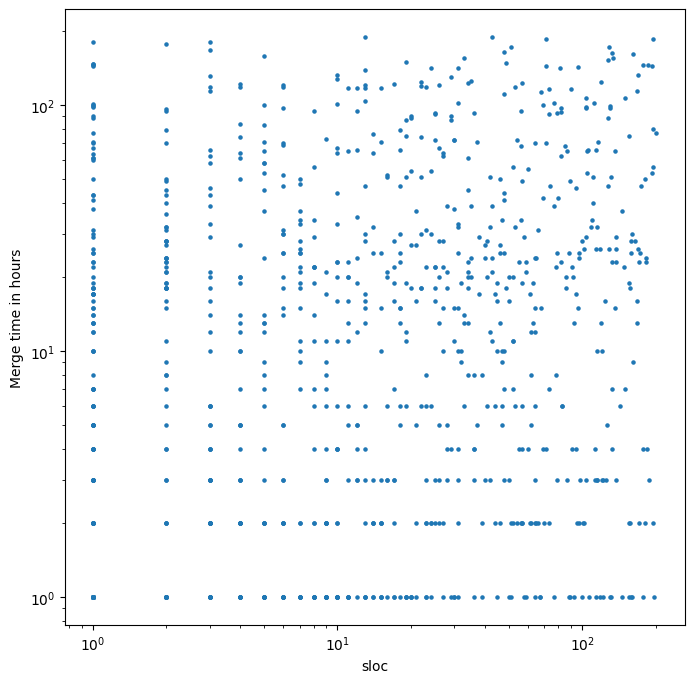

In [19]:
# Figure 3
# A scatter plot of pull request sizes and time-to-merge. Random sample of 𝑁 = 1,000 pull requests.
sloc=df.sample(n=1000,random_state=3)
day=sloc["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
sloc["Merge time minutes"]=day

plt.figure(figsize=(8,8))
plt.axes(xscale='log', yscale='log')
plt.scatter(sloc['sloc'], sloc["Merge time minutes"]/60,s=5)
plt.xlabel('Total changes (SLOC) per pull request')
plt.ylabel('Merge time in hours')

In [20]:
# Table 4 Time-to-merge (hours) and SLOC per pull request
# N = total number, M = mean, Mdn = median, SD = standard deviation.


day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= df.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID","Modifications", "Files changed","Insertions","Deletions"])
pull=pull.groupby(["Language"]).agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})
display(pull)

Merge time hours                                    sloc         \
                          N       mean median        std       mean median   
Language                                                                     
C                     35063  25.257280    8.0  38.354588  31.139092   11.0   
CPlusPlus            103516  29.339735   11.0  41.542143  30.748638   12.0   
CSharp                56069  31.766038   15.0  42.296980  37.638624   16.0   
Java                  44404  27.497748    7.0  41.846797  41.459531   19.0   
JavaScript            57977  23.002553    6.0  36.737978  28.699070   10.0   
Php                   65965  27.598696    9.0  40.764371  27.128083    9.0   
Python               102489  30.200422   12.0  42.008823  31.266487   12.0   
Ruby                  65882  23.111912    6.0  37.691758  25.511581    9.0   
Shell                 11524  23.661489    6.0  38.673973  21.318900    5.0   
TypeScript            81807  25.711773    6.0  40.361397  37.764800   16.0   

                       
                  std  
Language               
C           43.339598  
CPlusPlus   42.375277  
CSharp      47.674949  
Java        49.795862  
JavaScript  41.434088  
Php         39.557609  
Python      42.668001  
Ruby        38.679871  
Shell       36.567111  
TypeScript  47.427707

In [ ]:
#Figure 2: A barplot of time-to-merge for pull requests.
